In [156]:
import tarfile
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [157]:
file =r'C:\Users\miles\Projects\datasets\crcns\hc2\ec013.527\ec013.527.clu.1'

In [158]:
os.path.abspath('C:\\Users\\miles\\Projects\\datasets')

'C:\\Users\\miles\\Projects\\datasets'

In [159]:
def get_data(clusters_file, spikes_file):
#     labels_file = open(labels_file)
    clusters = clusters_file.readlines()
    num_clu = int(clusters[0][:-1])-2
#     num_clu = clusters[0][:-1]
    clusters = np.array([k[:-1] for k in clusters],dtype='int')[1:]
#     labels = np.array([k[:-1] for k in labels])
    
    spikes = spikes_file.readlines()
    spikes = np.array([k[:-1] for k in spikes],dtype='float')
    
    spikes = spikes[clusters>1]
    clusters = clusters[clusters>1]
    
    spikes, clusters = spikes[spikes.argsort()], clusters[spikes.argsort()] # sorting the arrays by spike time
    
    
    return clusters, spikes, num_clu


# h2 datasets Hippocampus

Looking at the 4 shank silicon probe seperately...
- in the clusters file, clusters 0 represent artifacts and clusters 1 represent noisy/nonclusterable units.

In [172]:
shanks = 4

In [173]:
clusters, spikes, num_clu = [],[],[]

for i in range(shanks):
    (clusters_file, spikes_file) = (
        open(f"C:\\Users\\miles\\Projects\\datasets\\crcns\\hc2\\ec013.527\\ec013.527.clu.{i+1}"),
        open(f"C:\\Users\miles\\Projects\\datasets\\crcns\\hc2\\ec013.527\\ec013.527.res.{i+1}")
    )
    a,b,c = get_data(clusters_file, spikes_file)
    clusters.append(a)
    spikes.append(b)
    num_clu.append(c)

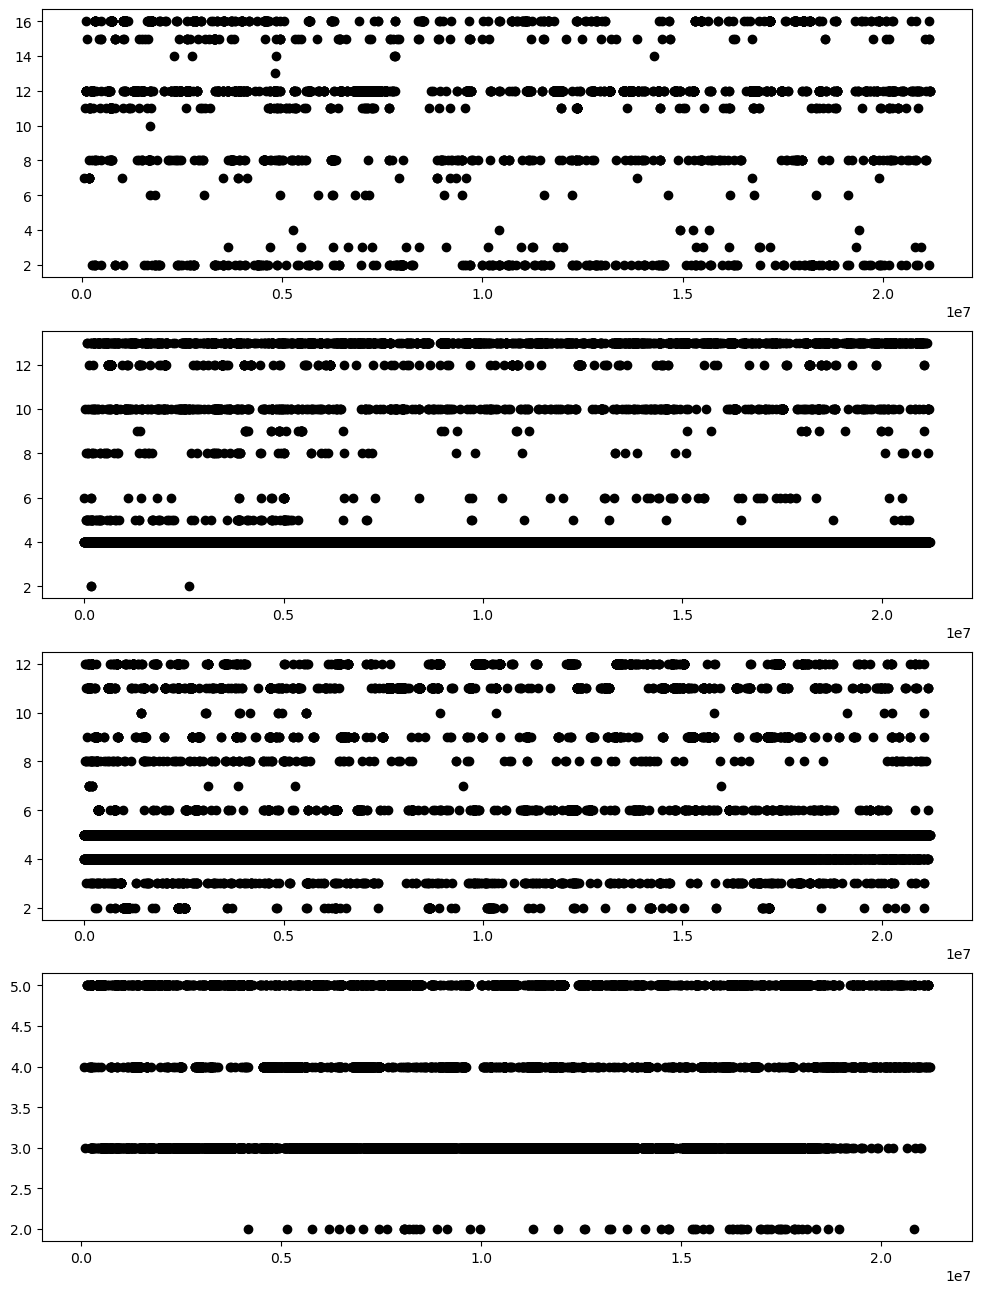

In [180]:
fig, ax = plt.subplot_mosaic('A;B;C;D',figsize=(12,16))
axs = 'ABCD'
[ax[axs[i]].scatter(spikes[i],clusters[i], c='black') for i in range(shanks)]
plt.show()

In [163]:
shanks=8

In [164]:
clusters, spikes, num_clu = [],[],[]

for i in range(shanks):
    (clusters_file, spikes_file) = (
        open(f"C:\\Users\\miles\\Projects\\datasets\\crcns\\hc2\\ec014.793\\ec014.793.clu.{i+1}"),
        open(f"C:\\Users\miles\\Projects\\datasets\\crcns\\hc2\\ec014.793\\ec014.793.res.{i+1}")
    )
    a,b,c = get_data(clusters_file, spikes_file)
    clusters.append(a)
    spikes.append(b)
    num_clu.append(c)

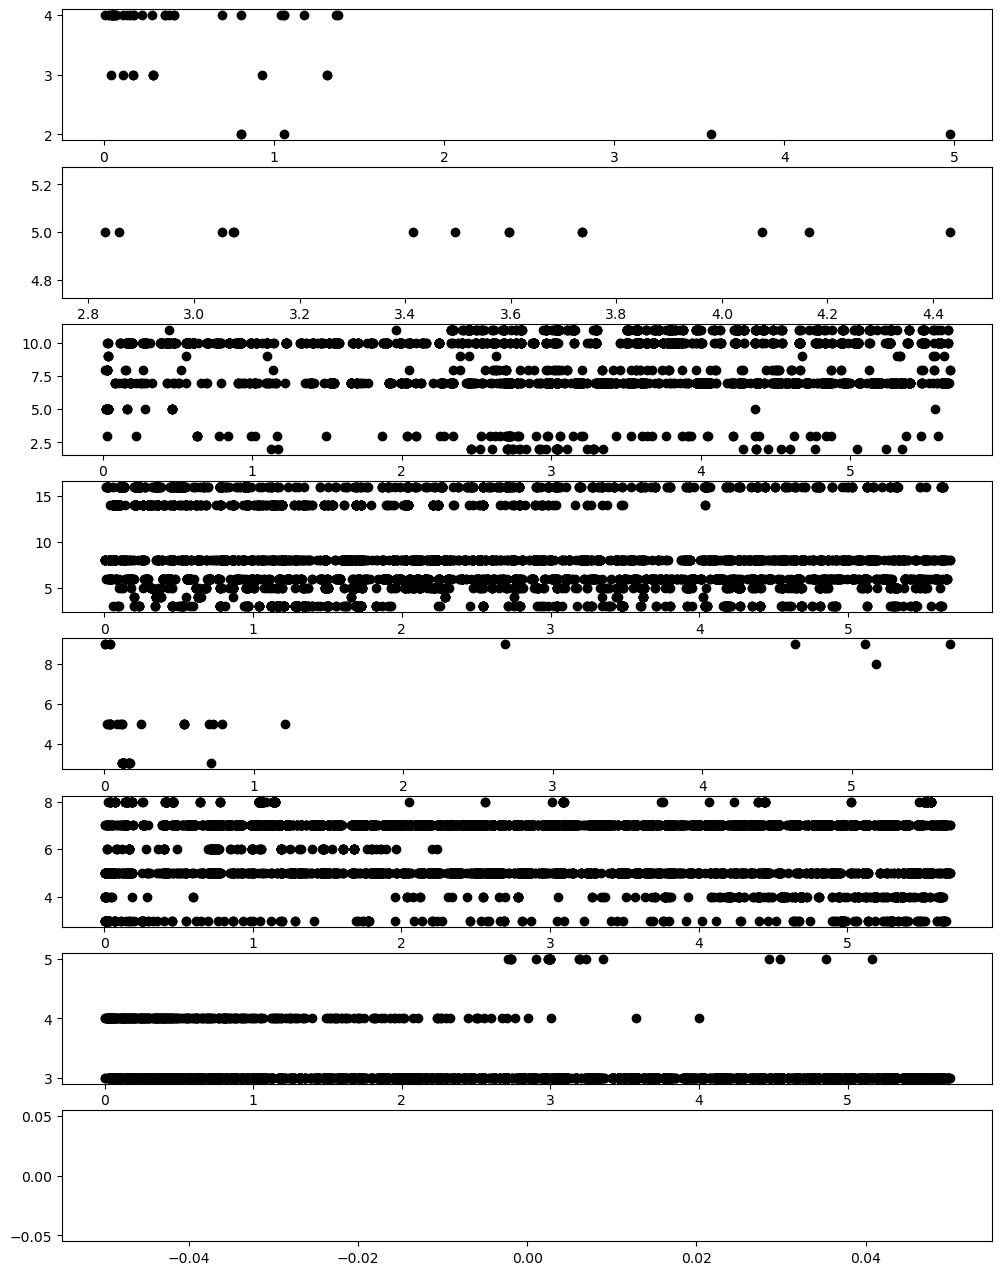

In [165]:
fig, ax = plt.subplot_mosaic('A;B;C;D;E;F;G;H',figsize=(12,16))
axs = 'ABCDEFGH'
[ax[axs[i]].scatter(spikes[i],clusters[i], c='black') for i in range(shanks)]

plt.show()


# ac3 datasets Auditory Cortex

In [24]:
filenames = os.listdir(r'C:\Users\miles\Projects\datasets\crcns\ac3\Data')
filenames

['site1-rn1.mat',
 'site10-rn16.mat',
 'site11-rn1.mat',
 'site12-rn16.mat',
 'site13-rn1.mat',
 'site14-rn16.mat',
 'site15-rn1.mat',
 'site16-rn16.mat',
 'site2-rn16.mat',
 'site3-rn1.mat',
 'site4-rn16.mat',
 'site5-rn1.mat',
 'site6-rn16.mat',
 'site7-rn1.mat',
 'site8-rn16.mat',
 'site9-rn1.mat']

In [27]:
import scipy.io
test = [scipy.io.loadmat(r'C:\Users\miles\Projects\datasets\crcns\ac3\Data\\'+k) for k in filenames]

In [50]:
df = pd.DataFrame(test[0]['spk'][0])

In [52]:
df

,chan,model,depth,position,stim,header,spiketimes,outliers,fs,probechan,meanwaveform
0,[[3]],[[0]],[[800]],"[[50, 250]]",[rn1],"[# Model 0, number of model points = 80, numbe...","[[605.084839, 644.65564, 1017.742371, 1024.682...","[[735.998047, 6671.749023, 8195.005859, 10025....",[[20000]],[[32]],"[[-1.0, 0.0], [-0.95, 0.0], [-0.9, -13.0], [-0..."
1,[[17]],[[1]],[[800]],"[[-50, 300]]",[rn1],"[# Model 1, number of model points = 80, numbe...","[[311.430542, 397.70105, 712.379517, 774.29998...","[[1024.950928, 1586.565552, 1693.358032, 3023....",[[20000]],[[4]],"[[-1.0, 0.0], [-0.95, -13.0], [-0.9, 0.0], [-0..."
2,[[5]],[[1]],[[800]],"[[50, 300]]",[rn1],"[# Model 1, number of model points = 80, numbe...","[[1019.047668, 1316.145264, 1436.895264, 1516....","[[4641.40918, 13162.232422, 15981.912109, 1874...",[[20000]],[[29]],"[[-1.0, 3.0], [-0.95, 11.0], [-0.9, 21.0], [-0..."
3,[[27]],"[[1, 2]]",[[800]],"[[-50, 350]]",[rn1],"[# Model 1, number of model points = 80, numbe...","[[1012.366821, 1023.468628, 1923.305664, 1925....",[],[[20000]],[[5]],"[[-1.0, 51.61290322580645], [-0.95, 53.5419354..."
4,[[27]],[[3]],[[800]],"[[-50, 350]]",[rn1],"[# Model 3, number of model points = 80, numbe...","[[612.122314, 904.884888, 1021.823242, 1379.85...","[[253.709564, 840.168762, 847.550293, 986.7010...",[[20000]],[[5]],"[[-1.0, 0.0], [-0.95, 2.0], [-0.9, 45.0], [-0...."
5,[[22]],"[[0, 1]]",[[800]],"[[-50, 400]]",[rn1],"[# Model 0, number of model points = 80, numbe...","[[1010.396606, 1109.877197, 1125.077148, 1131....","[[191463.125, 205524.5, 369681.0625, 439339.68...",[[20000]],[[6]],"[[-1.0, 0.0], [-0.95, -3.3898742341180266], [-..."
6,[[22]],[[2]],[[800]],"[[-50, 400]]",[rn1],"[# Model 2, number of model points = 80, numbe...","[[1008.213196, 1009.118774, 1016.792847, 1099....","[[22631.339844, 25224.910156, 27575.34375, 393...",[[20000]],[[6]],"[[-1.0, 0.0], [-0.95, 10.0], [-0.9, 9.0], [-0...."
7,[[22]],[[3]],[[800]],"[[-50, 400]]",[rn1],"[# Model 3, number of model points = 80, numbe...","[[1014.900024, 1016.093567, 1112.949951, 1131....","[[49492.820312, 65318.757812, 80627.71875, 130...",[[20000]],[[6]],"[[-1.0, 8.0], [-0.95, -5.0], [-0.9, -9.0], [-0..."
8,[[20]],"[[0, 1]]",[[800]],"[[-50, 450]]",[rn1],"[# Model 0, number of model points = 80, numbe...","[[1016.108398, 1917.458374, 1984.143555, 2119....","[[341307.6875, 475229.4375, 538522.625, 595444...",[[20000]],[[7]],"[[-1.0, 9.647887323943662], [-0.95, 6.97065727..."
9,[[20]],[[2]],[[800]],"[[-50, 450]]",[rn1],"[# Model 2, number of model points = 80, numbe...","[[430.605957, 1010.444824, 1099.650024, 1186.2...","[[1197.366577, 1551.252197, 1677.138062, 2549....",[[20000]],[[7]],"[[-1.0, -6.0], [-0.95, 11.0], [-0.9, 23.0], [-..."


In [128]:
fs = 20 # Sampling rate in kHz

In [129]:
test[0]['spk'][0]['spiketimes'][0].squeeze().shape

(3731,)

In [130]:
num_units = test[0]['spk'][0]['spiketimes'].shape[0]
spikes = np.array([])
labels = np.array([])
for i in range(num_units):
    spikes = np.hstack((spikes,test[0]['spk'][0]['spiketimes'][i].squeeze()))
    labels = np.hstack((labels,i*np.ones_like(test[0]['spk'][0]['spiketimes'][i].squeeze())))
spikes, labels = spikes[spikes.argsort()], labels[spikes.argsort()] # sorting the arrays by spike time
print(spikes.shape,labels.shape)

(72240,) (72240,)


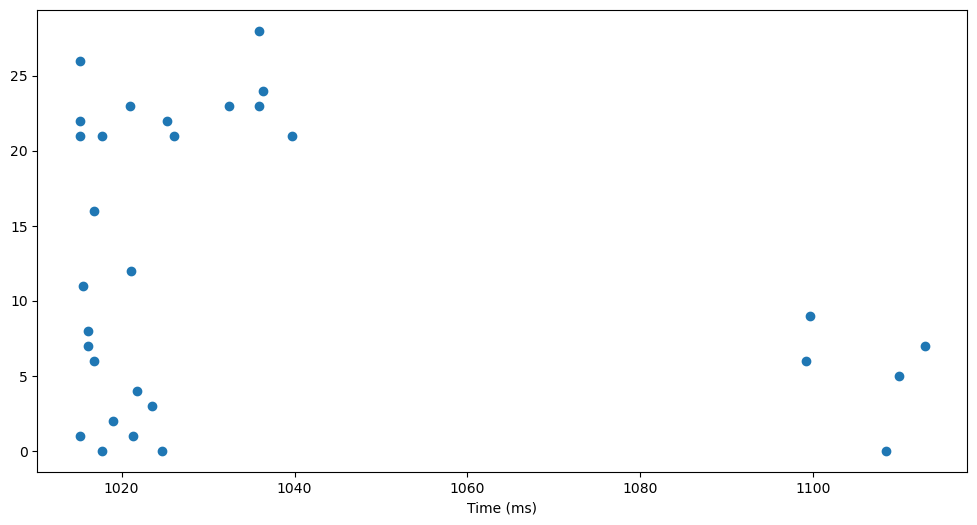

In [136]:
plt.figure(figsize=(12,6))
cut = slice(70,100)
plt.scatter(spikes[cut],labels[cut])
plt.xlabel('Time (ms)')
plt.show()

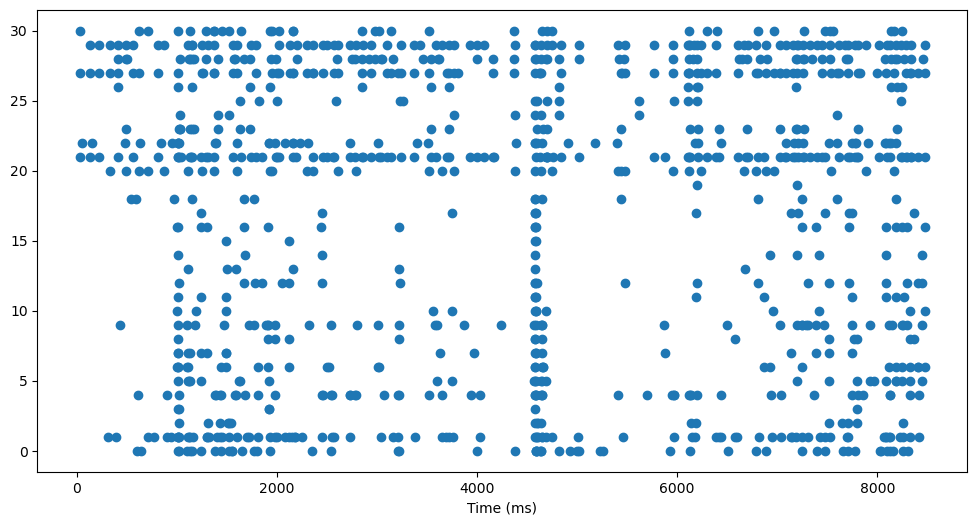

In [139]:
plt.figure(figsize=(12,6))
cut = slice(0,1000)
plt.scatter(spikes[cut],labels[cut])
plt.xlabel('Time (ms)')
plt.show()

# fcx-1 Frontal Cortex
- ACC
- mPFC

In [140]:
import scipy.io
test = scipy.io.loadmat(r'C:\Users\miles\Projects\datasets\crcns\fcx-1\Dino_061914_ACC\Dino_061914_ACC_SAll.mat')

In [143]:
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'S_CellFormat', 'S_TsdArrayFormat', 'shank', 'cellIx'])

In [145]:
df = pd.DataFrame(test['S_CellFormat'])
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,"[[4.64195], [7.41685], [8.79945], [9.90985], [...","[[34.85245], [38.5002], [97.2947], [104.6505],...","[[6.66515], [9.45815], [20.24125], [21.2981], ...","[[0.30975], [0.38275], [2.424], [2.79125], [2....","[[20.36995], [45.6269], [94.43625], [111.92885...","[[48.77725], [81.1968], [102.06685], [125.1580...","[[1.06625], [1.28765], [1.60695], [1.9967], [2...","[[8.7756], [15.7166], [16.17935], [34.45475], ...","[[185.5678], [398.7678], [470.22825], [587.911...","[[137.57625], [310.5785], [424.8982], [630.814...",...,"[[0.3371], [0.71175], [1.4762], [1.5769], [3.4...","[[6.55405], [6.58245], [11.43275], [13.2349], ...","[[12.59525], [12.96905], [15.0451], [17.1461],...","[[0.0608], [0.14625], [0.30875], [0.71525], [1...","[[6.1418], [8.50395], [8.83465], [11.9066], [1...","[[2.19545], [3.9161], [9.3429], [11.414], [16....","[[0.2134], [0.90645], [1.71995], [2.0071], [2....","[[0.0575], [0.15425], [0.47595], [0.71395], [0...","[[1.04195], [2.0429], [4.70265], [7.12045], [1...","[[15.5162], [58.1028], [70.50965], [97.5453], ..."


In [149]:
test['S_CellFormat'].shape

(1, 55)

In [170]:
data[0].squeeze().shape

(4566,)

In [172]:
data = test['S_CellFormat'][0]
num_units = data.shape[0]
spikes = ([])
labels = ([])
for i in range(num_units):
    spikes = np.hstack((spikes,data[i].squeeze()))
    labels = np.hstack((labels,i*np.ones_like(data[i].squeeze())))
spikes, labels = spikes[spikes.argsort()], labels[spikes.argsort()] # sorting the arrays by spike time
print(spikes.shape,labels.shape)
    

(1153309,) (1153309,)


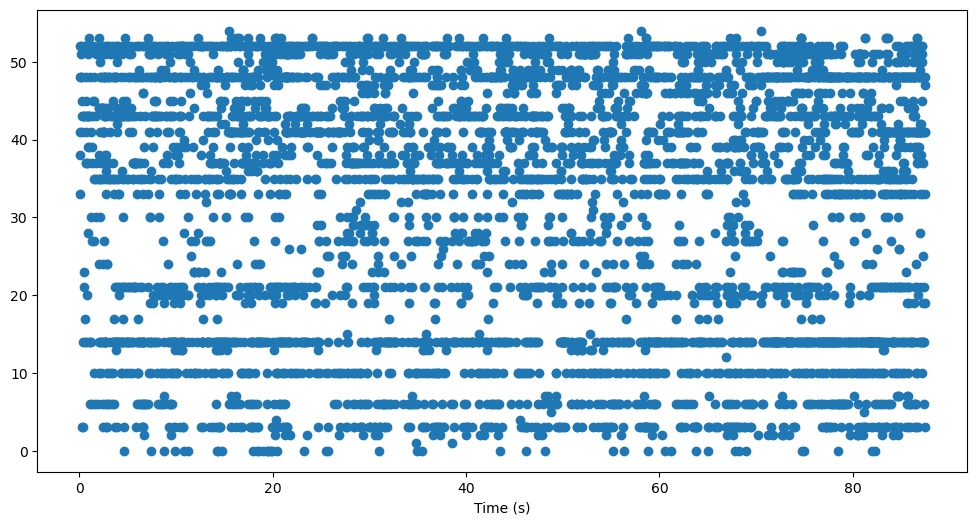

In [177]:
plt.figure(figsize=(12,6))
cut = slice(0,5000)
plt.scatter(spikes[cut],labels[cut])
plt.xlabel('Time (s)')
plt.show()

In [178]:
import scipy.io
test = scipy.io.loadmat(r'C:\Users\miles\Projects\datasets\crcns\fcx-1\Dino_061914_mPFC\Dino_061914_mPFC_SAll.mat')

In [179]:
data = test['S_CellFormat'][0]
num_units = data.shape[0]
spikes = ([])
labels = ([])
for i in range(num_units):
    spikes = np.hstack((spikes,data[i].squeeze()))
    labels = np.hstack((labels,i*np.ones_like(data[i].squeeze())))
spikes, labels = spikes[spikes.argsort()], labels[spikes.argsort()] # sorting the arrays by spike time
print(spikes.shape,labels.shape)
    

(1774204,) (1774204,)


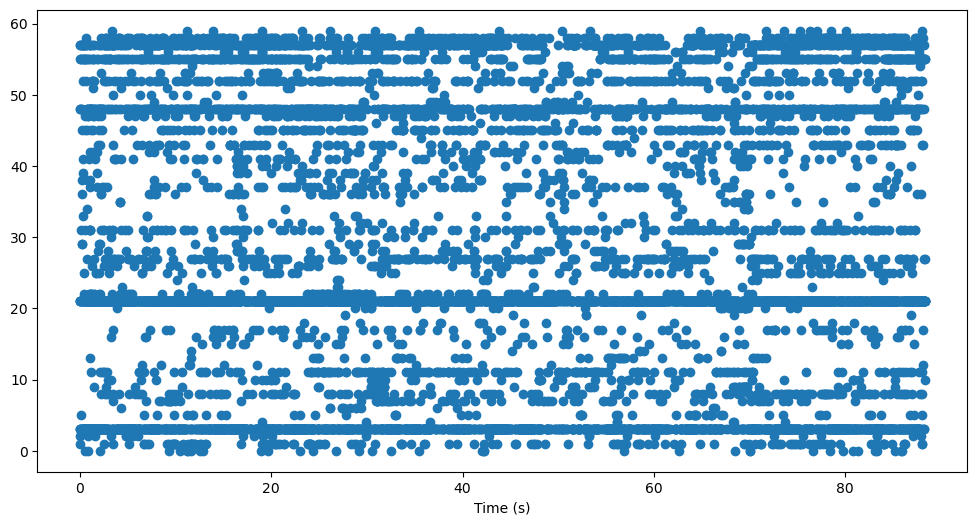

In [181]:
plt.figure(figsize=(12,6))
cut = slice(0,10000)
plt.scatter(spikes[cut],labels[cut])
plt.xlabel('Time (s)')
plt.show()

# pfc-2 
- sleep
- spontaneous alternation task
- working memory task

In [326]:
shanks = 13

In [327]:
clusters, spikes, num_clu = [],[],[]

for i in range(shanks):
    (clusters_file, spikes_file) = (
        open(f"C:\\Users\\miles\\Projects\\datasets\\crcns\\pfc-2\\EE.081\\EE.081.clu.{i+1}"),
        open(f"C:\\Users\miles\\Projects\\datasets\\crcns\\pfc-2\\EE.081\\EE.081.res.{i+1}")
    )
    a,b,c = get_data(clusters_file, spikes_file)
    clusters.append(a)
    spikes.append(b)
    num_clu.append(c)

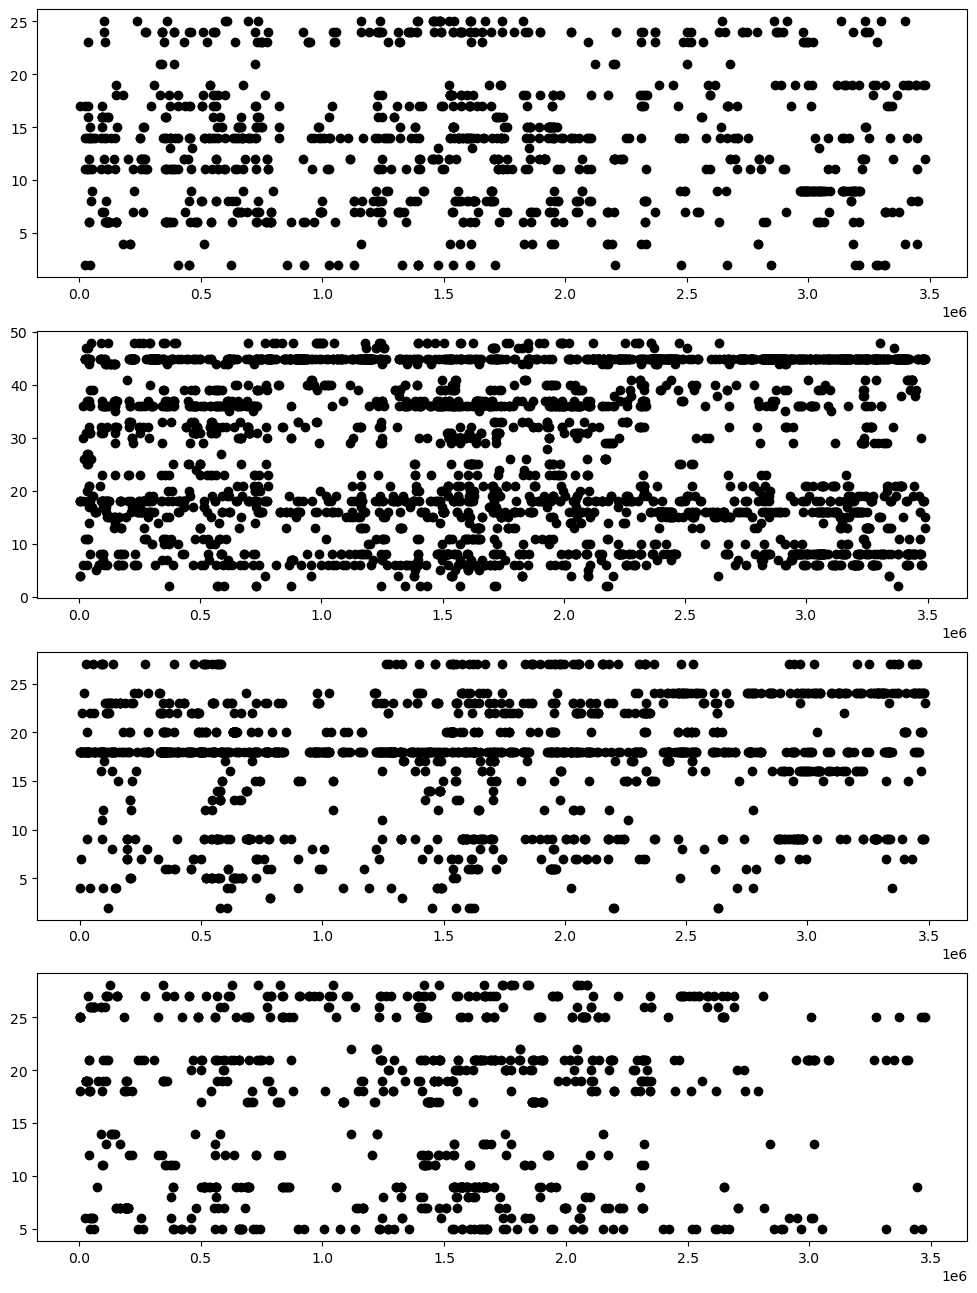

In [328]:
fig, ax = plt.subplot_mosaic('A;B;C;D',figsize=(12,16))
axs = 'ABCD'
[ax[axs[i]].scatter(spikes[i],clusters[i], c='black') for i in range(4)]

plt.show()

# ssc-3


In [330]:
filenames = os.listdir(r'C:\Users\miles\Projects\datasets\crcns\ssc-3\data')
filenames

['DataSet1.mat',
 'DataSet10.mat',
 'DataSet11.mat',
 'DataSet12.mat',
 'DataSet13.mat',
 'DataSet14.mat',
 'DataSet15.mat',
 'DataSet16.mat',
 'DataSet17.mat',
 'DataSet18.mat',
 'DataSet19.mat',
 'DataSet2.mat',
 'DataSet20.mat',
 'DataSet21.mat',
 'DataSet22.mat',
 'DataSet23.mat',
 'DataSet24.mat',
 'DataSet25.mat',
 'DataSet3.mat',
 'DataSet4.mat',
 'DataSet5.mat',
 'DataSet6.mat',
 'DataSet7.mat',
 'DataSet8.mat',
 'DataSet9.mat']

In [344]:
ssc3 = [scipy.io.loadmat(f'C:\\Users\\miles\\Projects\\datasets\\crcns\\ssc-3\\data\\{k}') for k in filenames]

Sanity Check \
in DataSet1, data.spikes{2}For(200) = 2051617.9. \
This indicates that the 200th spike of neuron 2 in DataSet1 occurred at 2051617.9 ms.

In [407]:
ssc3[0]['data'][0,0][0][1,0][0,199] # MATLAB STARTS AT index 1!!!

2051617.9

In [422]:
pd.DataFrame(ssc3[0]['data'][0,0][0])

,0
0,"[[8230.1, 10040.6, 10261.95, 10383.4, 10514.1,..."
1,"[[82043.0, 82051.4, 82059.05, 82071.6, 84944.6..."
2,"[[680548.55, 680700.85, 747860.55, 748010.6, 7..."
3,"[[138379.15, 174499.4, 174550.8, 174565.5, 174..."
4,"[[8651.0, 9884.35, 10361.7, 10366.9, 10834.25,..."
...,...
161,"[[71620.15, 71813.55, 141859.15, 209067.6, 217..."
162,"[[21359.4, 21407.35, 29016.85, 29034.6, 29052...."
163,"[[28685.05, 30032.6, 34586.0, 37265.35, 37344...."
164,"[[369624.85, 412821.05, 677003.25, 738598.8, 7..."


In [459]:
num_units = ssc3[0]['data'][0,0][1][0,0]
spikes = np.array([])
neurons = np.array([])
for i in range(num_units):
    spikes = np.hstack((spikes,ssc3[0]['data'][0,0][0][i][0][0]))
    neurons = np.hstack((neurons,i*np.ones_like(ssc3[0]['data'][0,0][0][i][0][0])))
spikes, neurons = spikes[spikes.argsort()], neurons[spikes.argsort()] # sorting the arrays by spike time
spikes.shape, neurons.shape

((938018,), (938018,))

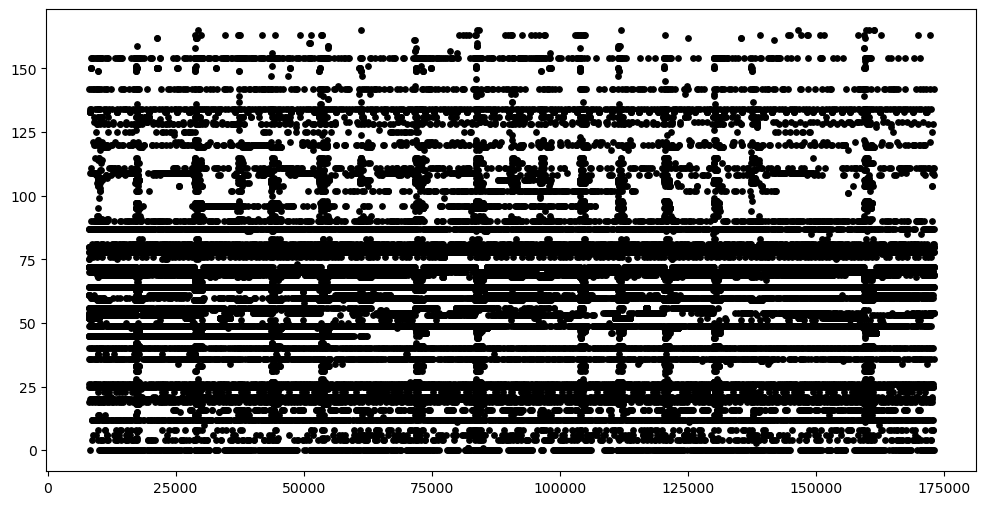

In [470]:
plt.figure(figsize=(12,6))
cut = slice(0,50000)
plt.scatter(spikes[cut],neurons[cut],c='black',s=15)
plt.show()

# th-1
- the clu files are corrupted?? will try another session...

In [2]:
shanks = 8

In [6]:
clusters, spikes, num_clu = [],[],[]

for i in range(shanks):
    (clusters_file, spikes_file) = (
        open(f"C:\\Users\\miles\\Projects\\datasets\\crcns\\th-1\\Mouse24-131213\\Mouse24-131213.clu.{i+1}"),
        open(f"C:\\Users\miles\\Projects\\datasets\\crcns\\th-1\\Mouse24-131213\\Mouse24-131213.res.{i+1}")
    )
    a,b,c = get_data(clusters_file, spikes_file)
    clusters.append(a)
    spikes.append(b)
    num_clu.append(c)

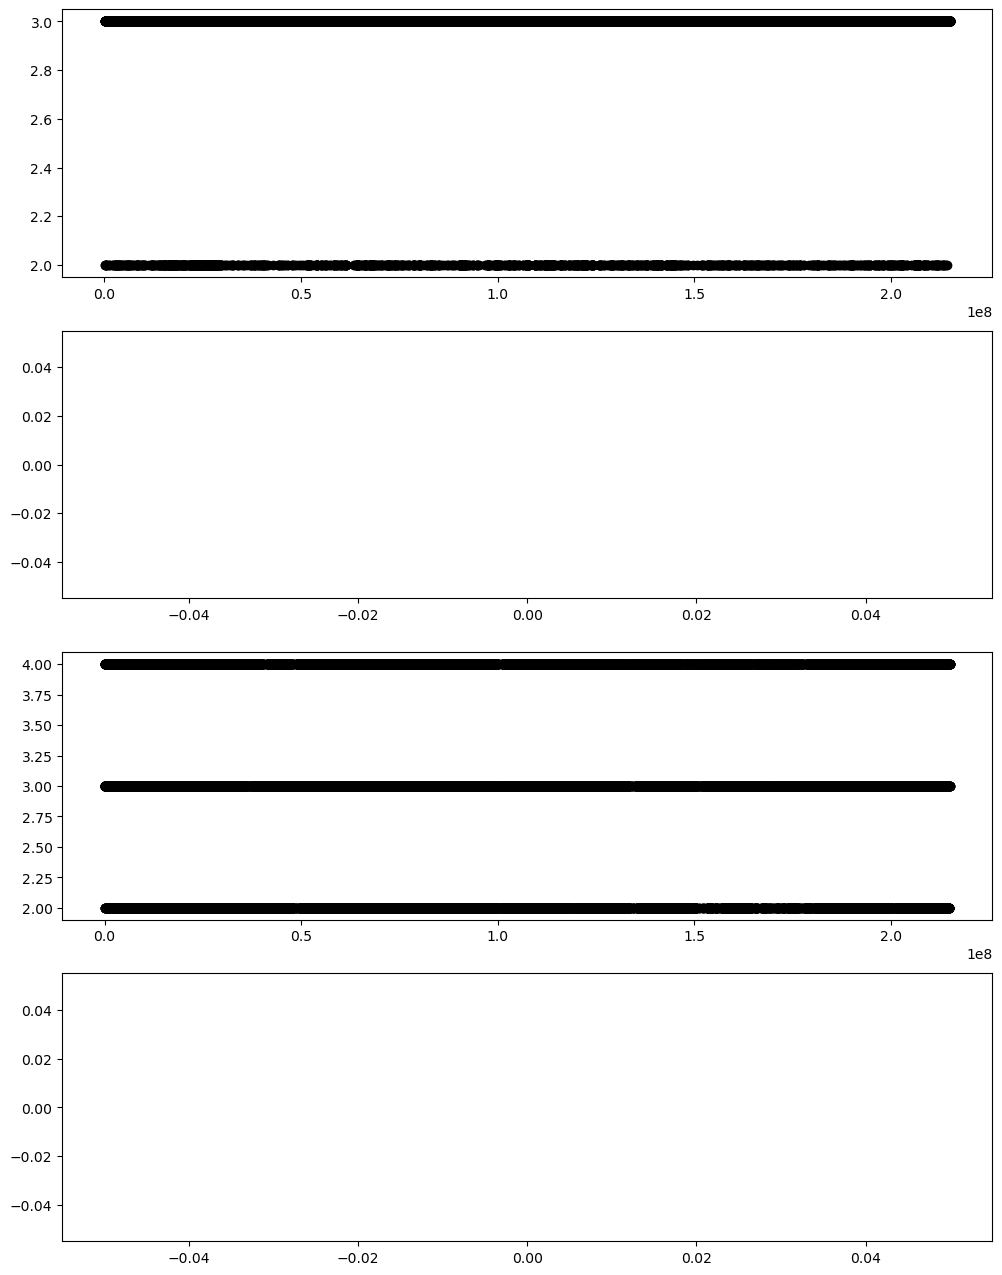

In [9]:
fig, ax = plt.subplot_mosaic('A;B;C;D',figsize=(12,16))
axs = 'ABCD'
[ax[axs[i]].scatter(spikes[i+4],clusters[i+4], c='black') for i in range(4)]
plt.show()

# ret-1

In [11]:
filenames = os.listdir(r'C:\Users\miles\Projects\datasets\crcns\ret-1\crcns_ret-1\Data')
filenames

['20080516_R1.mat',
 '20080516_R2.mat',
 '20080606_R1.mat',
 '20080606_R2.mat',
 '20080606_R3.mat',
 '20080624_R1.mat',
 '20080624_R2.mat',
 '20080624_R3.mat',
 '20080628_R2.mat',
 '20080628_R3.mat',
 '20080628_R4.mat',
 '20080628_R5.mat',
 '20080628_R6.mat',
 '20080628_R7.mat',
 '20080702_R1.mat',
 '20080702_R4.mat']

In [45]:
ret1 = [scipy.io.loadmat(f'C:\\Users\\miles\\Projects\\datasets\\crcns\\ret-1\\crcns_ret-1\\Data\\{k}') for k in filenames]


In [67]:
[print(k['spikes'].shape) for k in ret1]

(7, 3)
(34, 3)
(4, 3)
(6, 3)
(1, 3)
(37, 3)
(26, 3)
(38, 3)
(40, 1)
(32, 2)
(15, 2)
(43, 2)
(13, 2)
(14, 1)
(3, 2)
(12, 2)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [63]:
file_num=1

In [64]:
ret1[file_num]['spikes'].shape

(34, 3)

In [65]:
units = np.array([])
spikes = np.array([])
for i in range(ret1[file_num]['spikes'].shape[0]):
    spikes = np.hstack((spikes,ret1[file_num]['spikes'][i,0].squeeze()))
    units = np.hstack((units, i*np.ones_like(ret1[file_num]['spikes'][i,0].squeeze())))
spikes, units = spikes[spikes.argsort()], units[spikes.argsort()] # sorting the arrays by spike time
units.shape,spikes.shape

((378316,), (378316,))

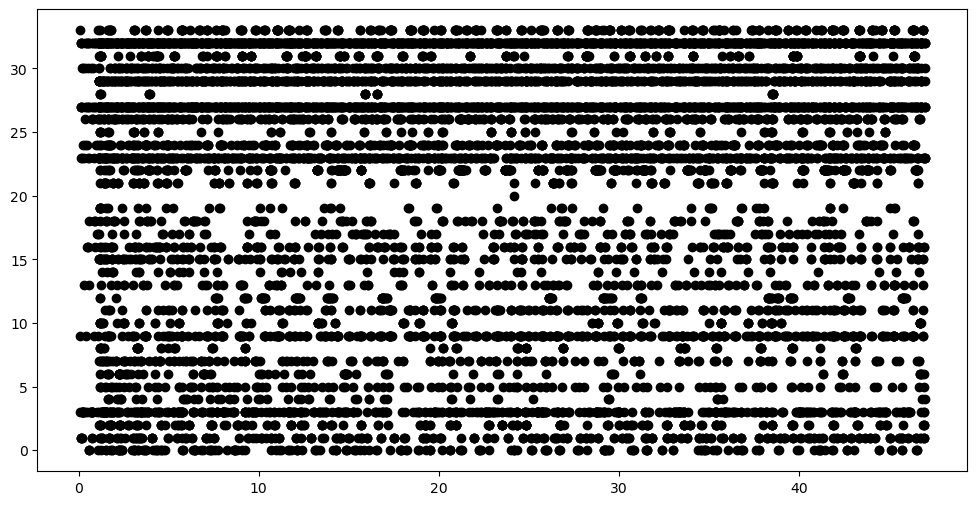

In [68]:
plt.figure(figsize=(12,6))
cut = slice(0,10000)
plt.scatter(spikes[cut],units[cut],c='black')
plt.show()

# aa-5

In [133]:
import pickle
path = r'C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl'
filenames = os.listdir(path)
filenames = [path + '\\' + f for f in filenames if not f.startswith('.')]
filenames

['C:\\Users\\miles\\Projects\\datasets\\crcns\\aa-5\\ZF4F_2t_190611_160843\\PlaybackPkl\\goodPlayback-e10-c3.pkl',
 'C:\\Users\\miles\\Projects\\datasets\\crcns\\aa-5\\ZF4F_2t_190611_160843\\PlaybackPkl\\goodPlayback-e10-c4.pkl',
 'C:\\Users\\miles\\Projects\\datasets\\crcns\\aa-5\\ZF4F_2t_190611_160843\\PlaybackPkl\\goodPlayback-e11-c6.pkl',
 'C:\\Users\\miles\\Projects\\datasets\\crcns\\aa-5\\ZF4F_2t_190611_160843\\PlaybackPkl\\goodPlayback-e12-c1.pkl',
 'C:\\Users\\miles\\Projects\\datasets\\crcns\\aa-5\\ZF4F_2t_190611_160843\\PlaybackPkl\\goodPlayback-e13-c2.pkl',
 'C:\\Users\\miles\\Projects\\datasets\\crcns\\aa-5\\ZF4F_2t_190611_160843\\PlaybackPkl\\goodPlayback-e15-c14.pkl',
 'C:\\Users\\miles\\Projects\\datasets\\crcns\\aa-5\\ZF4F_2t_190611_160843\\PlaybackPkl\\goodPlayback-e17-c2.pkl',
 'C:\\Users\\miles\\Projects\\datasets\\crcns\\aa-5\\ZF4F_2t_190611_160843\\PlaybackPkl\\goodPlayback-e17-c3.pkl',
 'C:\\Users\\miles\\Projects\\datasets\\crcns\\aa-5\\ZF4F_2t_190611_160843\\Pla

In [149]:
'''
Thank you chatgpt!
'''
import re

# List of file paths
file_paths = filenames

# Define a regex pattern to extract the cluster number
pattern = r'c(\d+)\.pkl'

# Create a dictionary to group filenames by cluster number
cluster_groups = {}

# Iterate through each file path
for file_path in file_paths:
    # Use regex to extract the cluster number
    match = re.search(pattern, file_path)
    if match:
        cluster_number = int(match.group(1))  # Extract the captured cluster number as an integer
        cluster_groups.setdefault(cluster_number, []).append(file_path)

clusters = np.array([])
spikes = np.array([])

# Print the grouped filenames
for cluster_number, filenames in cluster_groups.items():
    print(f"Cluster {cluster_number}:")
    for filename in filenames:
        fileIn = open(filename, 'rb')
        unitInfo = pickle.load(fileIn)
        dfRelTime = pickle.load(fileIn)
        fileIn.close()
        
        
        
        print(filename)


Cluster 3:
C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl\goodPlayback-e10-c3.pkl
C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl\goodPlayback-e17-c3.pkl
Cluster 4:
C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl\goodPlayback-e10-c4.pkl
Cluster 6:
C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl\goodPlayback-e11-c6.pkl
Cluster 1:
C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl\goodPlayback-e12-c1.pkl
C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl\goodPlayback-e8-c1.pkl
Cluster 2:
C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl\goodPlayback-e13-c2.pkl
C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl\goodPlayback-e17-c2.pkl
Cluster 14:
C:\Users\miles\Projects\datasets\crcns\aa-5\ZF4F_2t_190611_160843\PlaybackPkl\goodPlayback-e15-c14.pkl
Cluster 7:
C:\U

In [146]:
fileIn = open(filenames[2], 'rb')
unitInfo = pickle.load(fileIn)
dfAbsTime = pickle.load(fileIn) # ModuleNotFoundError: No module named 'pandas.core.indexes.numeric' using Metaflow !! need to use pandas < "2.0.0" 
dfRelTime = pickle.load(fileIn)
fileIn.close()
unitInfo

{'Bird': 'ZF4F',
 'Site': 'ZF4F_2t_190611_160843',
 'Electrode': '11',
 'Sort': 6,
 'RateThreshold': 3.2,
 'KDE_BW': 5.0,
 'nStim': 156,
 'StimName': array(['BlaBla0506_MAF_Ag_0_fs25k.wav', 'BlaBla0506_MAF_Ag_1_fs25k.wav',
        'BlaBla0506_MAF_Ag_2_fs25k.wav',
        'BlaBla0506_MAF_DC_7-3-6_fs25k.wav',
        'BlaBla0506_MAF_DC_8-4-1_fs25k.wav',
        'BlaBla0506_MAF_DC_9-2-5_fs25k.wav',
        'BlaBla0506_MAF_Ne_5-2-3_fs25k.wav',
        'BlaBla0506_MAF_Ne_6-9-1_fs25k.wav',
        'BlaBla0506_MAF_Ne_8-7-4_fs25k.wav',
        'BlaBla0506_MAF_So_0_fs25k.wav', 'BlaBla0506_MAF_So_1_fs25k.wav',
        'BlaBla0506_MAF_So_2_fs25k.wav',
        'BlaBla0506_MAF_Te_3-2-7_fs25k.wav',
        'BlaBla0506_MAF_Te_4-5-6_fs25k.wav',
        'BlaBla0506_MAF_Te_8-1-9_fs25k.wav',
        'BlaBla0506_MAF_Th_2-1-6_fs25k.wav',
        'BlaBla0506_MAF_Th_5-3-4_fs25k.wav',
        'BlaBla0506_MAF_Wh_2-1-6_fs25k.wav',
        'BlaBla0506_MAF_Wh_3-4-8_fs25k.wav',
        'BlaBla0506_MAF_Wh_7-9-5_fs2

In [147]:
dfAbsTime

,file,relation_short,call_type,start_time,duration,stop_time,file_path,spikes,On
101,GraLbl0457_MAS_Ne_3-6-7_fs25k.wav,GraL,Ne,607.62724,2.499960,610.627200,data/birds/ZF4F/sites/ZF4F_2t_190611_160843/.....,"[600.11116, 600.32032, 600.48204, 600.68264, 6...",True
102,BlaLbl8026_FAS_Ne_8-7-3_fs25k.wav,BlaL,Ne,614.60536,2.499960,617.605320,data/birds/ZF4F/sites/ZF4F_2t_190611_160843/.....,"[604.72932, 604.7442, 604.84444, 604.9032, 605...",True
103,LblBlu2028_MCS_LT_7-6-2_fs25k.wav,LblB,LT,619.89532,2.499960,622.895280,data/birds/ZF4F/sites/ZF4F_2t_190611_160843/.....,"[610.0728, 610.07408, 610.1262, 610.37072, 610...",True
104,GraLbl0457_MAS_So_2_fs25k.wav,GraL,So,626.14864,2.738800,629.387440,data/birds/ZF4F/sites/ZF4F_2t_190611_160843/.....,"[616.34, 616.35168, 616.37336, 616.75256, 616....",True
105,BlaLbl8026_FAS_Ne_2-6-9_fs25k.wav,BlaL,Ne,632.96124,2.499960,635.961200,data/birds/ZF4F/sites/ZF4F_2t_190611_160843/.....,"[623.00696, 623.43284, 623.48316, 623.59852, 6...",True
...,...,...,...,...,...,...,...,...,...
1232,stim13.wav,stim,None,8025.34032,2.444594,8028.284914,data/birds/ZF4F/sites/ZF4F_2t_190611_160843/.....,"[8015.3712, 8015.43888, 8015.46172, 8015.46708...",True
1233,stim19_sfilt.wav,stim,None,8034.23620,1.625438,8036.361638,data/birds/ZF4F/sites/ZF4F_2t_190611_160843/.....,"[8024.29936, 8024.32208, 8024.3414, 8024.4334,...",True
1234,stim1.wav,stim,None,8042.06668,2.356688,8044.923367,data/birds/ZF4F/sites/ZF4F_2t_190611_160843/.....,"[8032.07172, 8032.07576, 8032.13988, 8032.1410...",True
1235,stim19_tfilt.wav,stim,None,8050.00060,1.625438,8052.126038,data/birds/ZF4F/sites/ZF4F_2t_190611_160843/.....,"[8040.08, 8040.13888, 8040.1638, 8040.19376, 8...",True


In [154]:
dfRelTime

,file,relation_short,call_type,nTrials,trialInd,tStim,stimWav,micWav,spikeTimes,tKDE,spikeKDE,tMic
0,BlaBla0506_MAF_Ag_0_fs25k.wav,BlaB,Ag,5,"[128, 318, 349, 680, 813]","[-0.5, -0.49996, -0.49992, -0.49988, -0.49984,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-0.0007549350833893076, -0.00105713063240053...","[[0.014960000000087348, 0.3308800000000929, 0....","[-0.5, -0.499, -0.498, -0.497, -0.496, -0.495,...","[5.09884143644991, 5.222305853227743, 5.345372...","[-0.5, -0.4999599999999873, -0.499919999999974..."
1,BlaBla0506_MAF_Ag_1_fs25k.wav,BlaB,Ag,4,"[327, 714, 775, 1093]","[-0.5, -0.49996, -0.49992, -0.49988, -0.49984,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[5.636810207376719e-05, -0.000245708237647912...","[[-0.45499999999992724, -0.4453200000000379, -...","[-0.5, -0.499, -0.498, -0.497, -0.496, -0.495,...","[8.48252298120313, 8.728799974407764, 8.976901...","[-0.5, -0.499960000000101, -0.4999199999999746..."
2,BlaBla0506_MAF_Ag_2_fs25k.wav,BlaB,Ag,3,"[141, 323, 696]","[-0.5, -0.49996, -0.49992, -0.49988, -0.49984,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-0.0009396768732070626, -0.00013394128513333...","[[0.10120000000006257, 0.1368800000000192, 0.5...","[-0.5, -0.499, -0.498, -0.497, -0.496, -0.495,...","[1.4940784157097102, 1.5477102896055175, 1.601...","[-0.5, -0.4999599999999873, -0.499919999999974..."
3,BlaBla0506_MAF_DC_7-3-6_fs25k.wav,BlaB,DC,1,[812],"[-0.5, -0.49996, -0.49992, -0.49988, -0.49984,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-0.0006044392375945673, 0.000503372690200842...","[[-0.48931999999967957, -0.3262800000002244, 0...","[-0.5, -0.499, -0.498, -0.497, -0.496, -0.495,...","[2.5088429916785304, 2.5373819206733366, 2.563...","[-0.5, -0.499960000000101, -0.499920000000202,..."
4,BlaBla0506_MAF_DC_8-4-1_fs25k.wav,BlaB,DC,3,"[313, 336, 782]","[-0.5, -0.49996, -0.49992, -0.49988, -0.49984,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-1.2082433700655315e-05, 0.00018926205635061...","[[-0.4974400000000969, -0.4680000000000746, -0...","[-0.5, -0.499, -0.498, -0.497, -0.496, -0.495,...","[7.429979588565261, 7.659566674806596, 7.89149...","[-0.5, -0.499960000000101, -0.4999199999999746..."
...,...,...,...,...,...,...,...,...,...,...,...,...
151,stim8.wav,stim,None,1,[1221],"[-0.5, -0.49996875, -0.4999375, -0.49990625, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0002811777086257905, -0.000121630480766299...","[[-0.40027999999983876, -0.2534399999995003, -...","[-0.5, -0.499, -0.498, -0.497, -0.496, -0.495,...","[0.010606338365683128, 0.011842517409286192, 0...","[-0.5, -0.499960000000101, -0.4999199999992925..."
152,stim8_sfilt.wav,stim,None,1,[1227],"[-0.5, -0.49996875, -0.4999375, -0.49990625, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0003894810562132811, -0.000919794570922949...","[[-0.4772800000000643, -0.46299999999973807, -...","[-0.5, -0.499, -0.498, -0.497, -0.496, -0.495,...","[3.477097195062296, 3.596769592195503, 3.71713...","[-0.5, -0.499960000000101, -0.499920000000202,..."
153,stim9.wav,stim,None,1,[1212],"[-0.5, -0.49996875, -0.4999375, -0.49990625, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0007161758871079282, -0.000492367890357892...","[[-0.13628000000062457, -0.09808000000066386, ...","[-0.5, -0.499, -0.498, -0.497, -0.496, -0.495,...","[3.2093170371049817e-32, 4.8048985802000003e-3...","[-0.5, -0.499960000000101, -0.499920000000202,..."
154,stim9_sfilt.wav,stim,None,1,[1211],"[-0.5, -0.49996875, -0.4999375, -0.49990625, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[8.772016620639533e-05, 0.000893336544990575,...","[[-0.4816000000000713, -0.41868000000067696, -...","[-0.5, -0.499, -0.498, -0.497, -0.496, -0.495,...","[2.2778062811178823, 2.328837903811966, 2.3787...","[-0.5, -0.499960000000101, -0.499920000000202,..."
